# Курсовая работа
# Тема: Анализ рынка подержанных автомобилей в США
# Лозовой Вадим Сергеевич, ШАД-111

### Ссылка на датасет - https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset?resource=download

In [2]:
# Импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

# Настройки графиков
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Загрузка данных
df = pd.read_csv("USA_cars_datasets.csv")

# Очистка: убираем лишние столбцы и выбросы
df = df.drop(columns=["Unnamed: 0", "vin", "lot", "country", "condition"])
df = df[(df["price"] < 100000) & (df["mileage"] < 500000)]

# Выводим первые строки
df.head()

,price,brand,model,year,title_status,mileage,color,state
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida


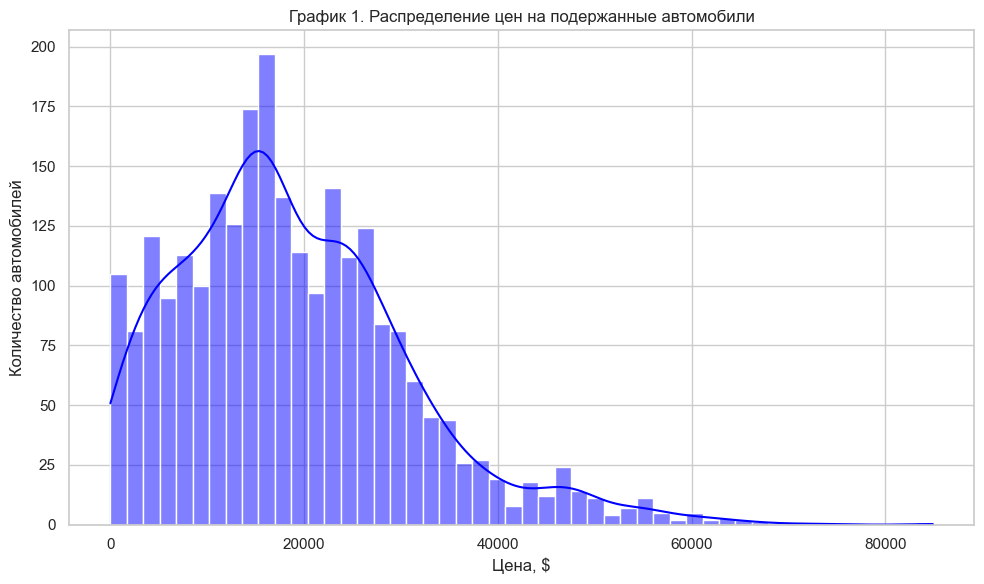

In [4]:
# График 1. Распределение цен на подержанные автомобили

plt.figure()
sns.histplot(df["price"], bins=50, kde=True, color='blue')
plt.title("График 1. Распределение цен на подержанные автомобили")
plt.xlabel("Цена, $")
plt.ylabel("Количество автомобилей")
plt.tight_layout()
plt.show()


## На графике показано распределение цен. Большинство автомобилей стоит от 5 000 до 20 000 долларов. Распределение правосторонне скошено.

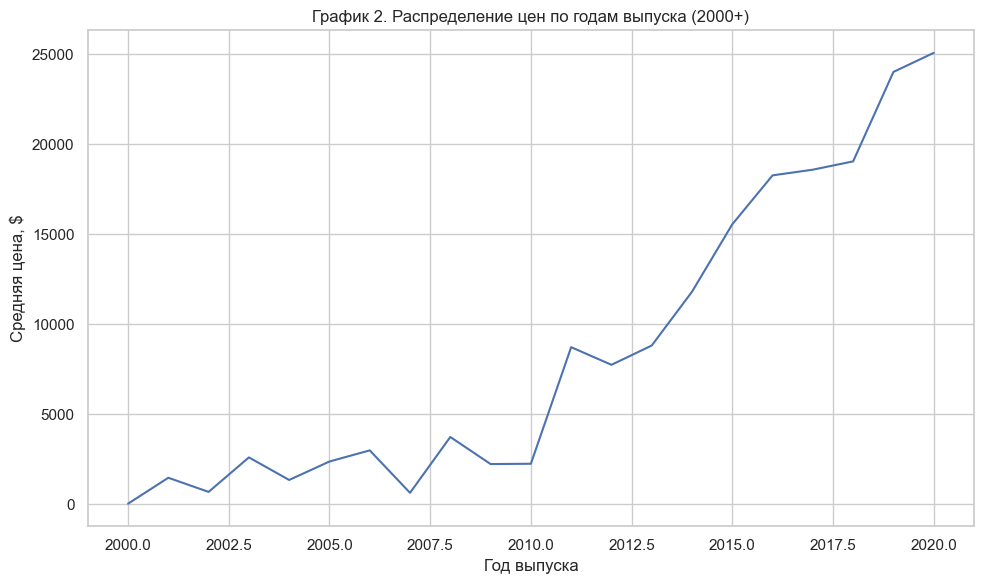

In [44]:
df_filtered = df[df["year"] >= 2000]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x="year", y="price", errorbar=None)
plt.title("График 2. Распределение цен по годам выпуска (2000+)")
plt.xlabel("Год выпуска")
plt.ylabel("Средняя цена, $")
plt.tight_layout()
plt.show()

### Попробуйте убрать наклон лейблов у боксплотов. Читается гораздо легче

## Диаграмма размаха позволяет увидеть разброс цен у популярных брендов. BMW, Chevrolet и Dodge — самые дорогие. Honda и Nissan — самые доступные.

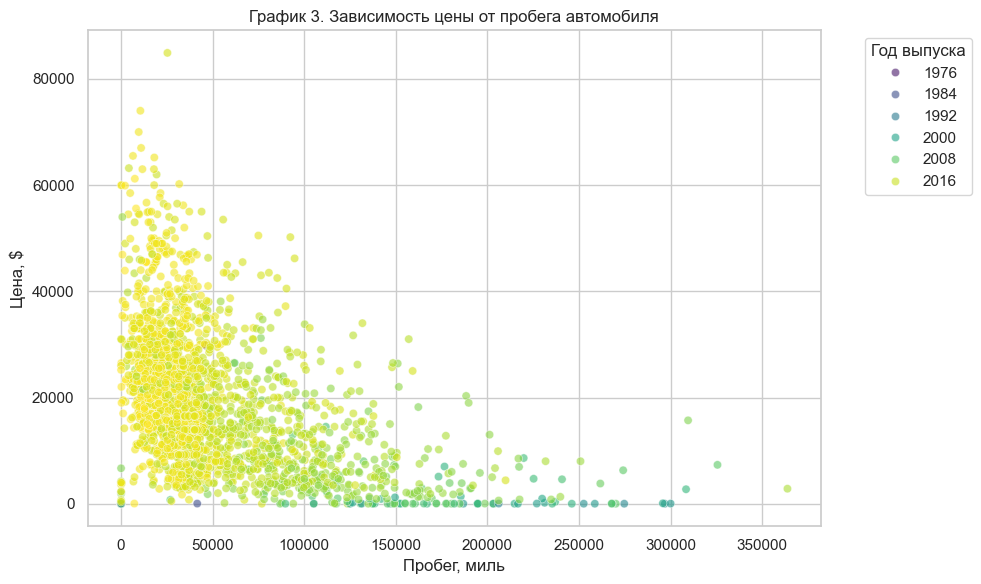

In [42]:
# График 3. Зависимость цены от пробега

plt.figure()
sns.scatterplot(data=df, x="mileage", y="price", hue="year", palette="viridis", alpha=0.6)
plt.title("График 3. Зависимость цены от пробега автомобиля")
plt.xlabel("Пробег, миль")
plt.ylabel("Цена, $")
plt.legend(title="Год выпуска", bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


## Видна чёткая отрицательная зависимость: чем выше пробег, тем ниже цена. Особенно заметно, что автомобили с пробегом до 100 000 миль стоят значительно дороже. Более новые машины (цвет светлее) тоже дороже.

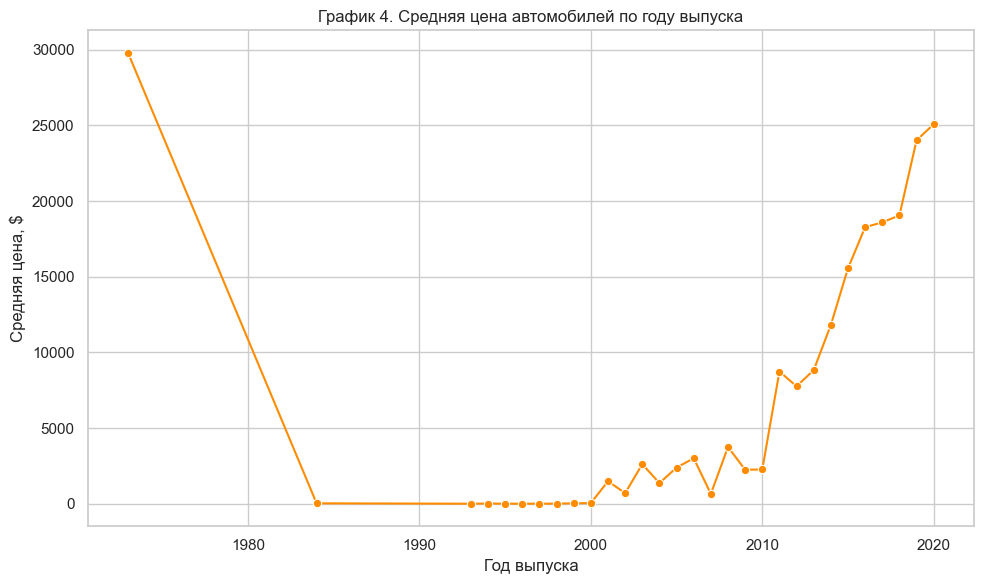

In [40]:
# График 4. Средняя цена автомобилей по году выпуска

year_price = df.groupby("year")["price"].mean().reset_index()

plt.figure()
sns.lineplot(data=year_price, x="year", y="price", marker="o", color='darkorange')
plt.title("График 4. Средняя цена автомобилей по году выпуска")
plt.xlabel("Год выпуска")
plt.ylabel("Средняя цена, $")
plt.tight_layout()
plt.show()


### У автомобилей старше 2000 года цена либо 0, либо 25. Не считая одного автомобиля 1973 года, странные цены. Возможно, какая-то проблема в качестве данных, я бы рекомендовала на графике ограничиться периодом с 2000 года и дальше. Иначе странно, что машины до 2000 года бесплатные. Ну и там самих машин всего ничего по сравнению с размером датасета, так что не стоит их учитывать

In [17]:
df[df['year'] < 2000]

,price,brand,model,year,title_status,mileage,color,state
32,29800,chevrolet,camaro,1973,clean vehicle,46226.0,red,pennsylvania
293,0,chevrolet,pickup,1998,salvage insurance,258631.0,gray,texas
313,0,ford,van,1998,salvage insurance,186855.0,blue,california
322,0,ford,chassis,1994,salvage insurance,0.0,green,california
323,0,ford,door,1997,salvage insurance,203297.0,green,minnesota
330,0,ford,door,1996,salvage insurance,296860.0,green,california
362,25,ford,pickup,1994,salvage insurance,206162.0,white,georgia
370,0,ford,door,1997,salvage insurance,146912.0,green,wisconsin
371,0,ford,door,1998,salvage insurance,131367.0,white,illinois
395,25,ford,door,1998,salvage insurance,300021.0,brown,arkansas


## Средняя цена автомобилей растёт с годом выпуска. Это логично: более новые автомобили стоят дороже. Резкий рост наблюдается после 2015 года.

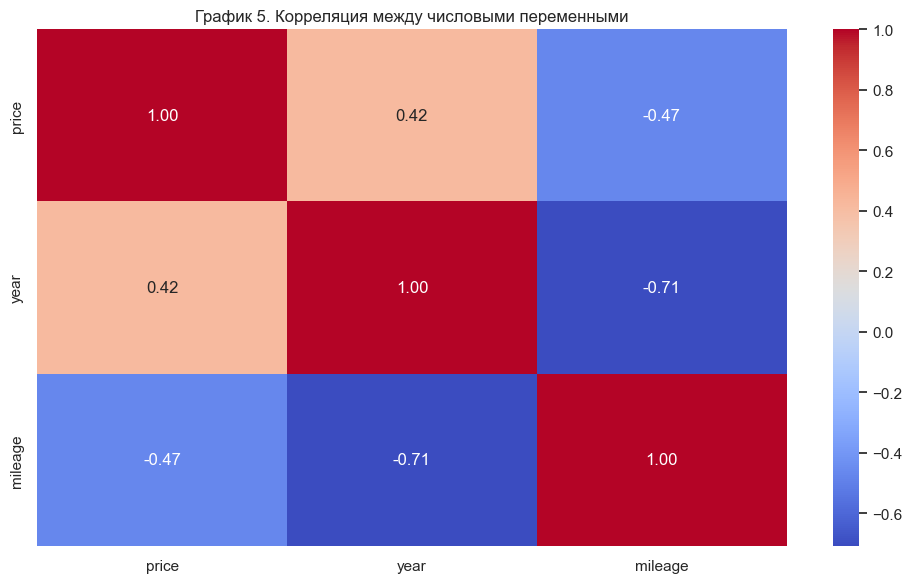

In [20]:
# График 5. Корреляция между числовыми переменными

numeric_corr = df[["price", "year", "mileage"]].corr()

plt.figure()
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("График 5. Корреляция между числовыми переменными")
plt.tight_layout()
plt.show()

Цена отрицательно коррелирует с пробегом (-0.54) и положительно с годом выпуска (+0.45). Это подтверждает гипотезу: более новые и менее изношенные авто стоят дороже.

## Заключение

В ходе анализа вторичного рынка автомобилей в США были построены и проанализированы 5 графиков, которые позволили подтвердить несколько ключевых гипотез:

1. **Цена и пробег:** между ценой и пробегом наблюдается чёткая отрицательная зависимость. Чем больше пробег, тем дешевле автомобиль. Это ожидаемый результат, подтверждённый диаграммой рассеяния и тепловой картой корреляций.

2. **Год выпуска и цена:** новые автомобили стоят значительно дороже. Средняя цена стабильно растёт с годом выпуска, особенно начиная с 2015 года.

3. **Марка автомобиля:** наблюдаются существенные различия в ценах между брендами. BMW, Chevrolet и Dodge — одни из самых дорогих брендов, в то время как Honda и Nissan — более доступные.

4. **Распределение цен:** большинство автомобилей находятся в ценовом диапазоне от 5 000 до 20 000 долларов. Распределение правосторонне скошено, что характерно для подобных выборок.

5. **Корреляции:** из числовых переменных сильнее всего с ценой коррелируют год выпуска и пробег. Это подчёркивает ключевые рыночные факторы, влияющие на стоимость.

**Вывод:**  
Графики и анализ подтвердили логичные, но важные особенности вторичного авторынка. Визуализация данных помогла не только проверить гипотезы, но и наглядно представить результаты, которые могут быть полезны как для покупателей, так и для продавцов автомобилей.
